In [15]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.linalg import toeplitz


# Direct convolution
def direct_convolution(f, g):
    n = len(f)
    p = len(g)
    result = np.zeros(n + p - 1)
    for i in range(n + p - 1):
        for j in range(max(0, i - p + 1), min(i + 1, n)):
            result[i] += f[j] * g[i - j]
    return result


# Direct convolution using matrix multiplication
def direct_convolution_matrix(f, g):
    n, p = len(f), len(g)
    toeplitz_matrix = np.zeros((n + p - 1, n))
    for i in range(n):
        toeplitz_matrix[i : i + p, i] = g
    result = toeplitz_matrix @ f
    return toeplitz_matrix


# Direct convolution using matrix multiplication and FFT
def fft_convolution(f, g):
    n = len(f)
    p = len(g)
    F = fft(f, n + p - 1)
    G = fft(g, n + p - 1)
    result = np.real(ifft(F * G))
    return result

In [18]:
# show 3 significant digits
np.set_printoptions(precision=3, suppress=True)

In [19]:
# test above functions have same result with random input
f = np.random.rand(10)
g = np.random.rand(2)
result1 = direct_convolution_matrix(f, g)
result2 = direct_convolution_matrix2(f, g)
result3 = fft_convolution(f, g)
# print(np.allclose(result1, result2))
# print(np.allclose(result1, result3))
print(result1)
print(result2)

[[0.277 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.9   0.277 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.9   0.277 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.9   0.277 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.9   0.277 0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.9   0.277 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.9   0.277 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.9   0.277 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.9   0.277 0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.9   0.277]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.9  ]]
[[0.277 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.277 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.277 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.277 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.277 0.    0.    0.    0.  

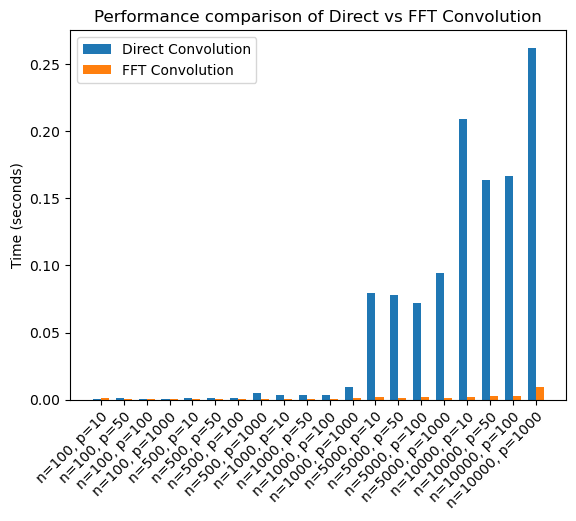

In [4]:
if __name__ == "__main__":
    ns = [100, 500, 1000, 5000, 10000]  # Different sizes for n
    ps = [10, 50, 100, 1000]  # Different sizes for p

    direct_times = []
    fft_times = []

    for n in ns:
        for p in ps:
            f = np.random.rand(n)
            g = np.random.rand(p)

            # Benchmarking direct convolution
            start_time = time.time()
            direct_result = direct_convolution_matrix(f, g)
            direct_time = time.time() - start_time
            direct_times.append(direct_time)

            # Benchmarking FFT convolution
            start_time = time.time()
            fft_result = fft_convolution(f, g)
            fft_time = time.time() - start_time
            fft_times.append(fft_time)

    # Create plot
    labels = [f"n={n}, p={p}" for n in ns for p in ps]
    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width / 2, direct_times, width, label="Direct Convolution")
    rects2 = ax.bar(x + width / 2, fft_times, width, label="FFT Convolution")

    ax.set_ylabel("Time (seconds)")
    ax.set_title("Performance comparison of Direct vs FFT Convolution")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    plt.show()